In [1]:
%matplotlib inline

import os
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from __init__ import calc_perceptual_hash, get_sub_images


plt.rcParams.update({'figure.max_open_warning': 0})

In [ ]:
captcha_dir = '/data2/heqingy/captchas/'
captcha_path_list = '/data2/heqingy/filelist.txt'

all_dist = []
buckets = defaultdict(list)
with open(captcha_path_list) as reader:
    for _ in xrange(10000):
        cur_path = os.path.join(captcha_dir, reader.readline().strip())
        sub_images = get_sub_images(Image.open(cur_path))
        gray_hashes = map(lambda i: calc_perceptual_hash(i, mode='GRAY', return_hex_str=True), sub_images)
        rgb_hashes = map(lambda i: calc_perceptual_hash(i, mode='RGB', return_hex_str=False), sub_images)
        for i in xrange(8):
            if gray_hashes[i] in buckets:
                for prev_rgb_hash in buckets[gray_hashes[i]]:
                    all_dist.append(np.sum(rgb_hashes[i] != prev_rgb_hash))
            else:
                buckets[gray_hashes[i]].append(rgb_hashes[i])
counter = Counter(all_dist)     
for i in xrange(20):
    print i, counter[i]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0 1134
1 565
2 459
3 457
4 393
5 288
6 244
7 174
8 151
9 112
10 80
11 58
12 61
13 44
14 29
15 23
16 31
17 24
18 26
19 18


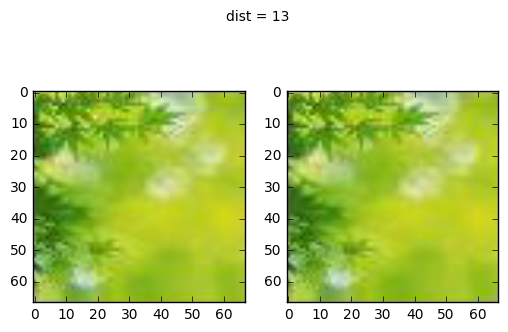

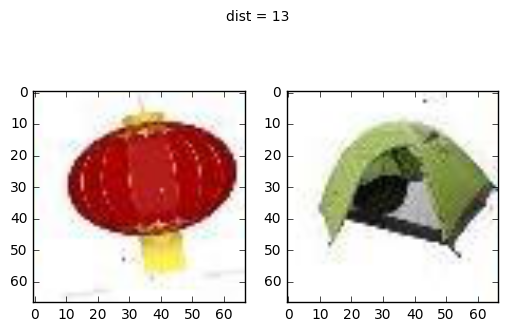

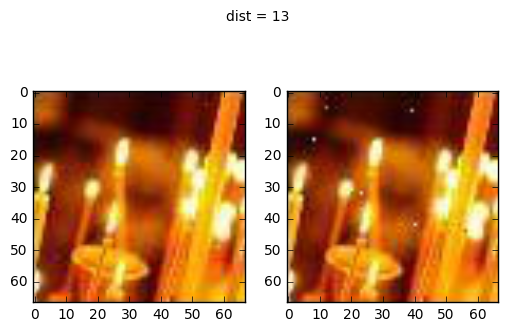

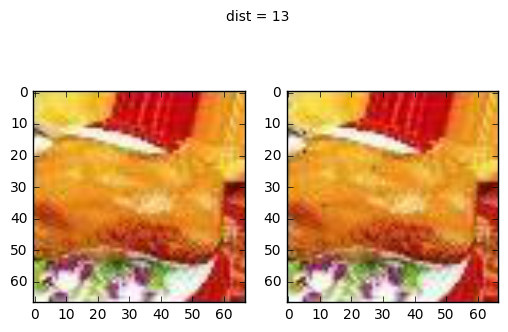

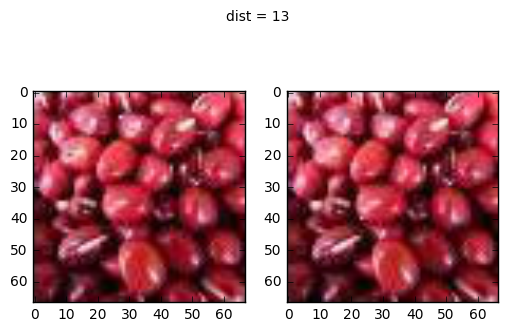

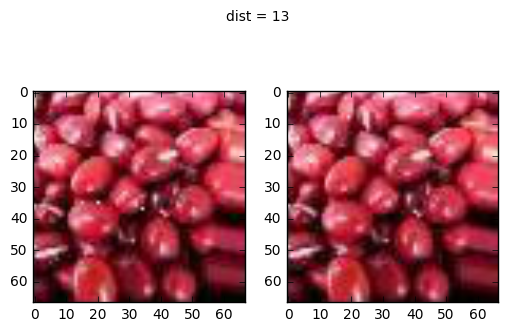

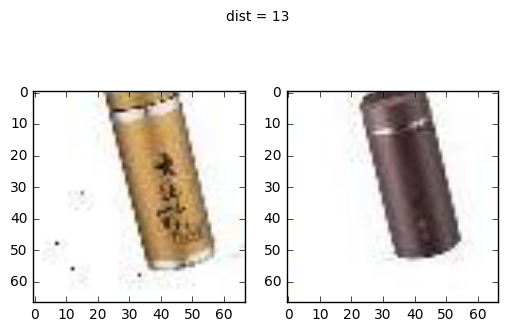

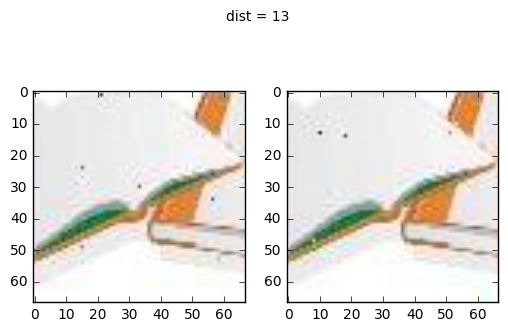

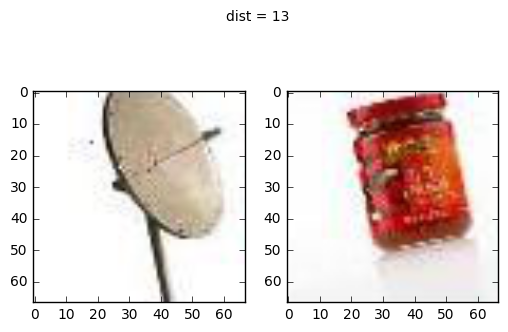

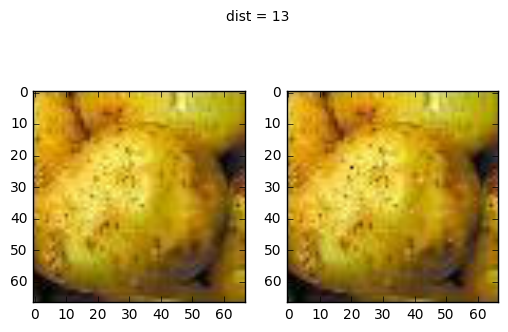

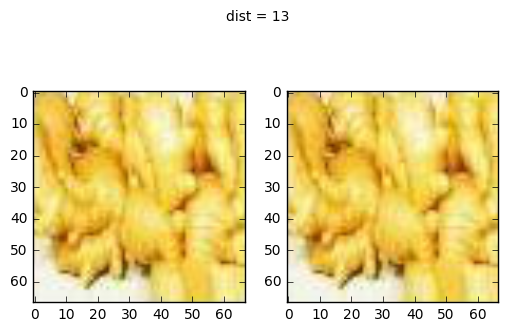

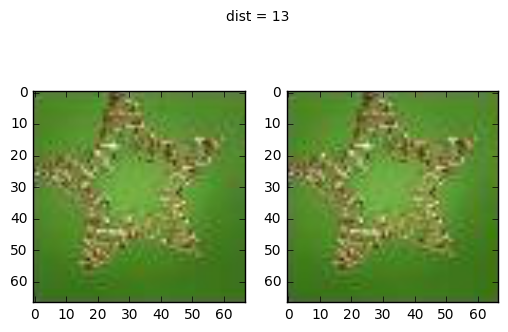

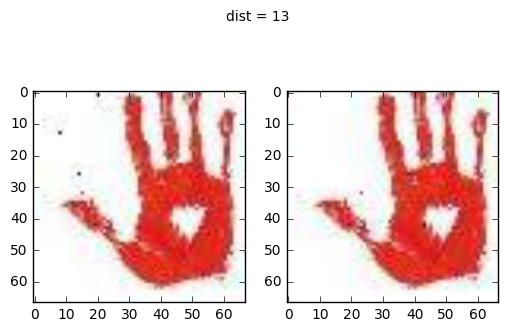

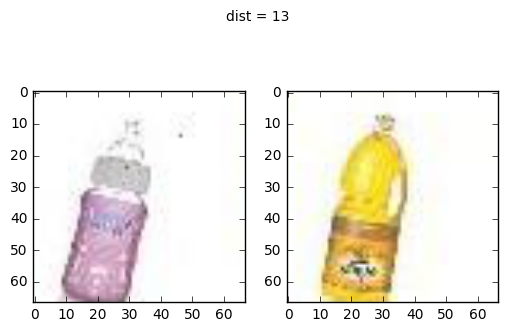

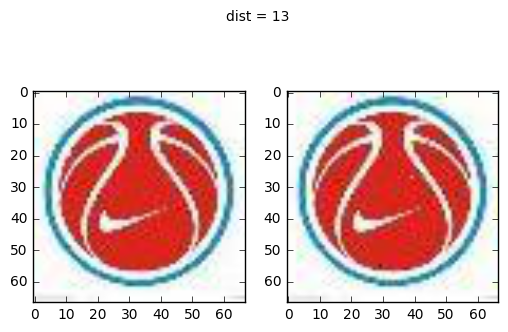

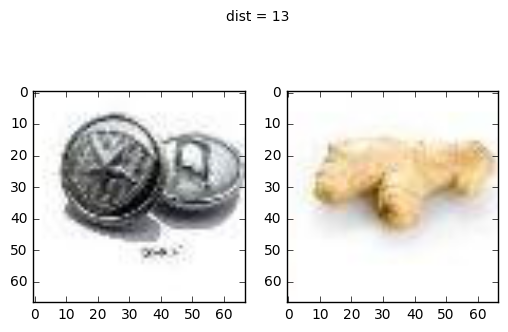

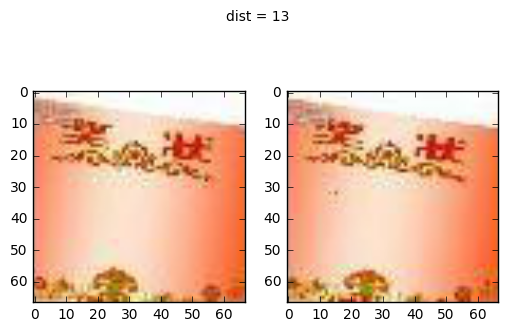

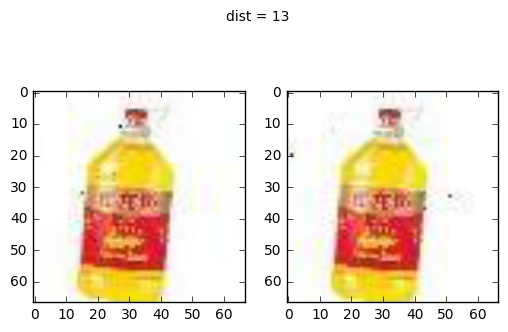

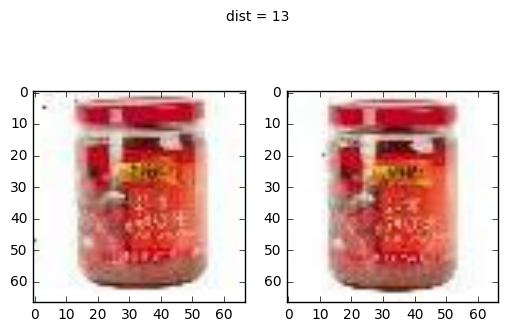

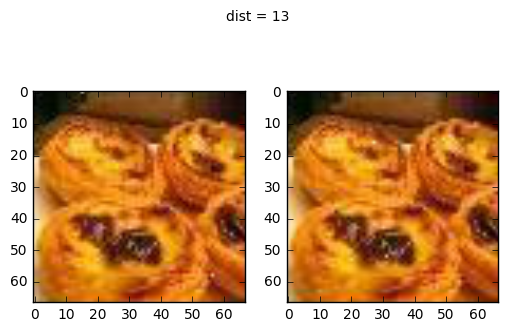

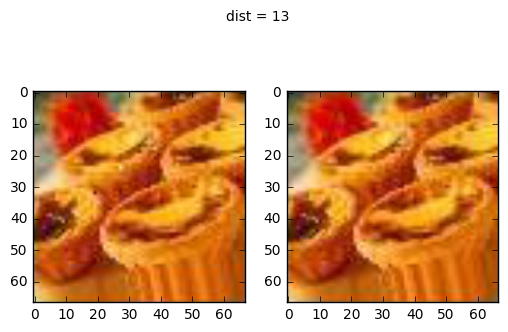

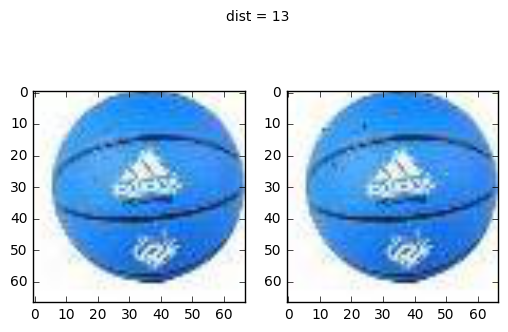

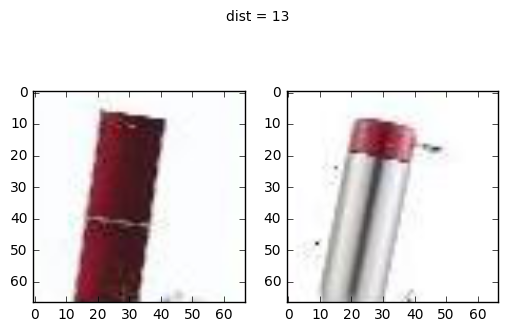

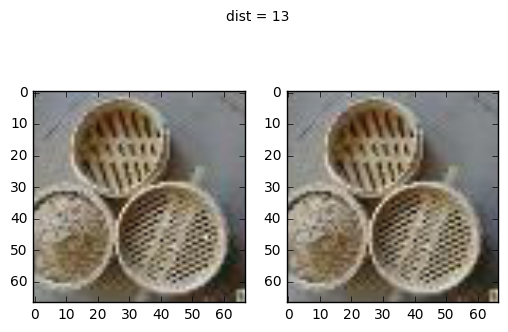

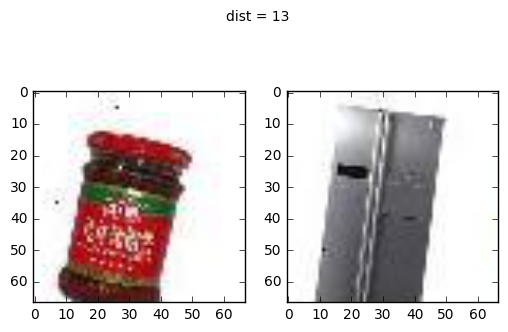

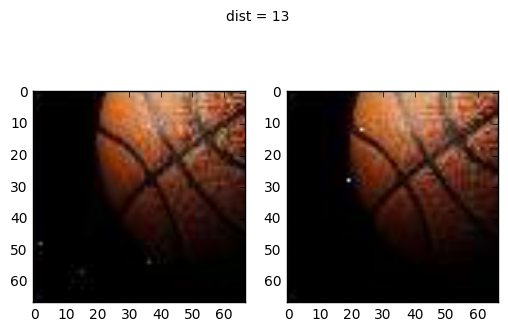

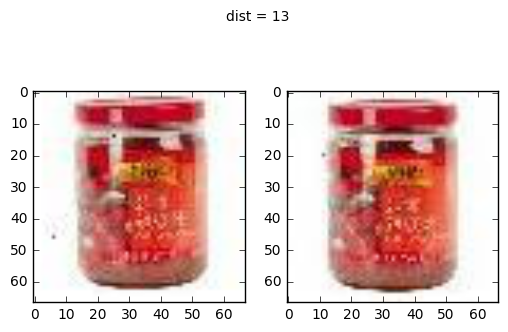

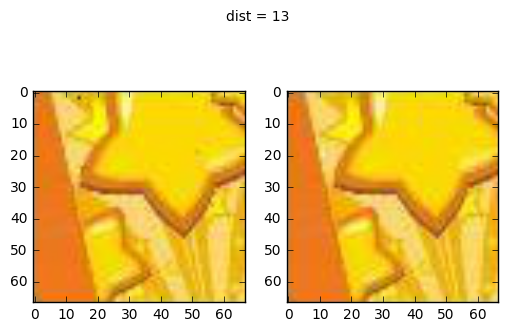

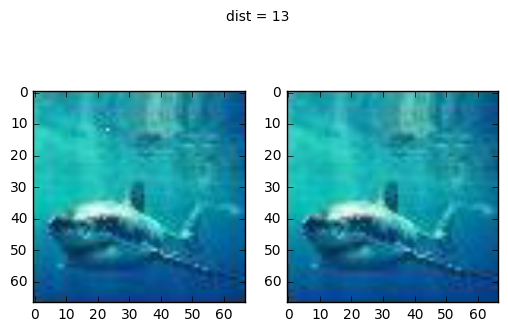

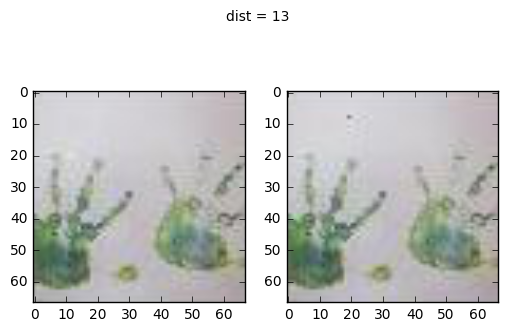

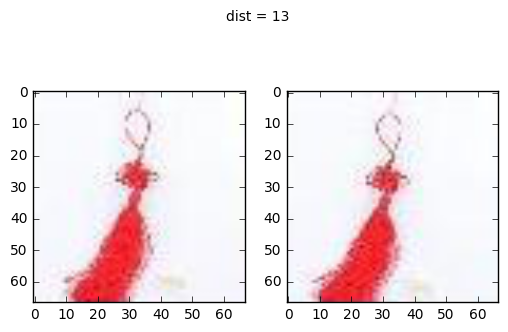

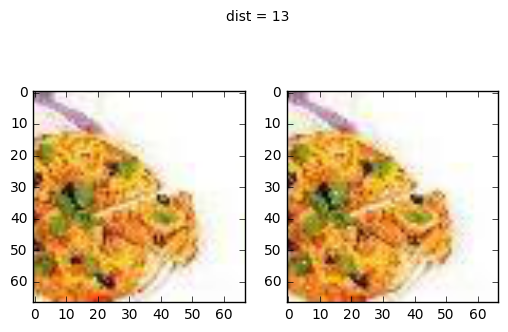

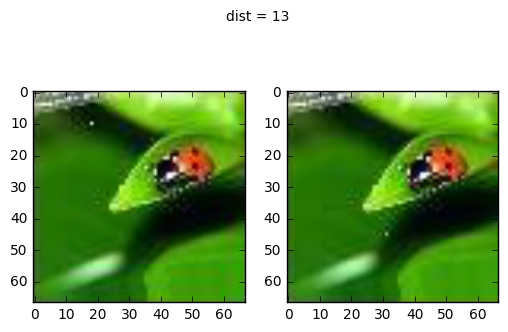

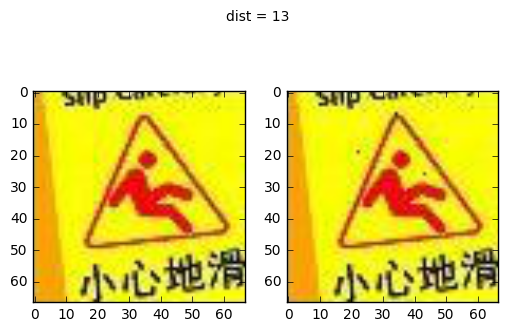

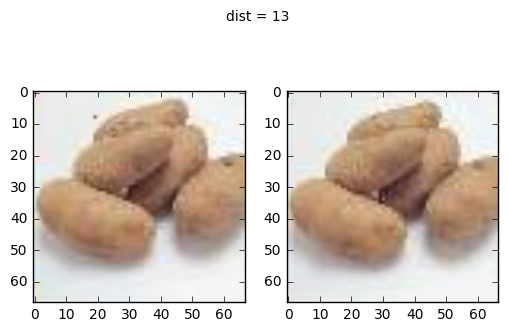

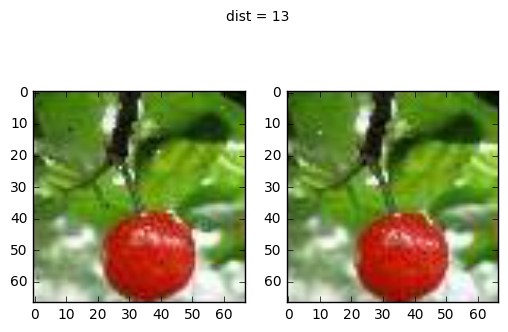

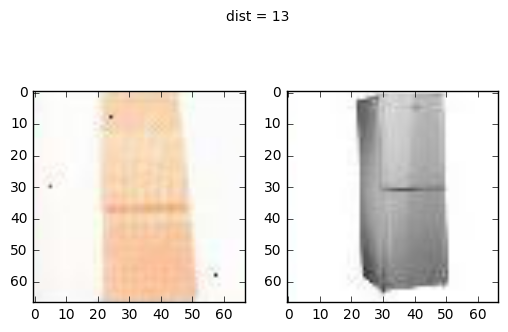

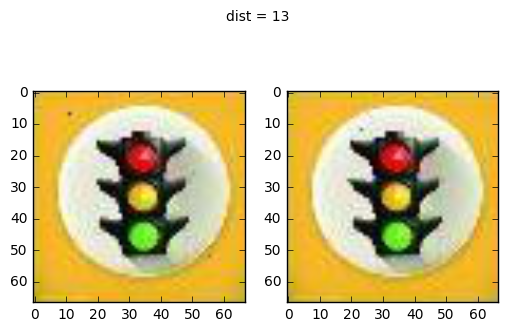

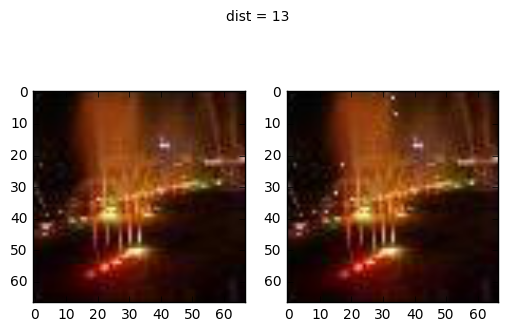

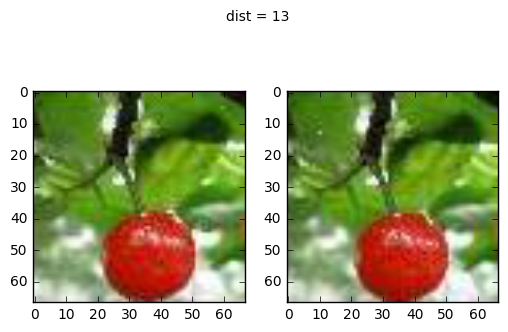

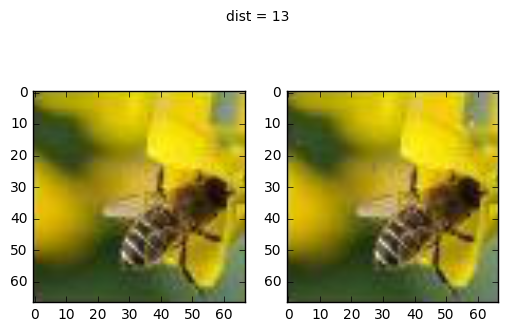

In [12]:
# This is rgb hashes
captcha_dir = '/home/haonans/capstone/raw_images/'
captcha_path_list = '/home/haonans/capstone/captcha_path_list.txt'

captcha_dir = '/data2/heqingy/captchas'
captcha_path_list = '/data2/heqingy/filelist.txt'


all_dist = []
buckets = defaultdict(list)
with open(captcha_path_list) as reader:
    for _ in xrange(3000):
        cur_path = os.path.join(captcha_dir, reader.readline().strip())
        try:
            image = Image.open(cur_path)
        except IOError:
            print '.',
            continue
        sub_images = get_sub_images(image)
        gray_hashes = map(lambda i: calc_perceptual_hash(i, mode='GRAY', return_hex_str=True), sub_images)
        rgb_hashes = map(lambda i: calc_perceptual_hash(i, mode='RGB', return_hex_str=False), sub_images)
        for i in xrange(8):
            if gray_hashes[i] in buckets:
                for prev_sub_image in buckets[gray_hashes[i]]:
                    prev_rgb_hash = calc_perceptual_hash(prev_sub_image, mode='RGB', return_hex_str=False)
                    dist = np.sum(rgb_hashes[i] != prev_rgb_hash)
                    all_dist.append(dist)
                    
                    if dist >= 13 and dist <= 13:
                        fig = plt.figure()
                        fig.suptitle('dist = {}'.format(dist))
                        plt.subplot(1,2,1)
                        plt.imshow(sub_images[i])
                        plt.subplot(1,2,2)
                        plt.imshow(prev_sub_image)
            else:
                buckets[gray_hashes[i]].append(sub_images[i])

counter = Counter(all_dist)     
for i in xrange(20):
    print i, counter[i]